# Imports

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
from plotly.offline import iplot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

#Conect plotly and pandas
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Load data

In [3]:
df = pd.read_csv("datasets/heart.csv")

# Data Dictionary 

1. Age: Age of the patient [years]
2. Sex: Sex of the patient [M: Male, F: Female]
3. ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: Resting blood pressure [mm Hg]
5. Cholesterol: Serum cholesterol [mm/dl]
6. FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: ST [Numeric value measured in depression]
11. ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: Output class [1: heart disease, 0: Normal]

# Getting a first view on the dataset

In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Check data types

Age, RestingBP, Cholesterol, FastingBS, MaxHR, OldPeak and HeartDisease should be int/float. We check it out with df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
numericalCols = df.select_dtypes("number").columns
categoricalCols = df.select_dtypes("object").columns

print("Numerical columns: ", numericalCols)
print("Categorical columns: ", categoricalCols)

Numerical columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
Categorical columns:  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


Data Types seem to be correct.

# Number of duplicated values

In [7]:
df.duplicated().sum()

0

There are no duplicates. 

# Checking for null values

In [8]:
df.isnull().sum().sort_values(ascending=False)

HeartDisease      0
ST_Slope          0
Oldpeak           0
ExerciseAngina    0
MaxHR             0
RestingECG        0
FastingBS         0
Cholesterol       0
RestingBP         0
ChestPainType     0
Sex               0
Age               0
dtype: int64

In [9]:
df.isna().sum().sort_values(ascending=False)

HeartDisease      0
ST_Slope          0
Oldpeak           0
ExerciseAngina    0
MaxHR             0
RestingECG        0
FastingBS         0
Cholesterol       0
RestingBP         0
ChestPainType     0
Sex               0
Age               0
dtype: int64

There are no missing values

# Numerical variables analysis

## Value Distribution and Skewed Classes

In [10]:
numericalCols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
df[numericalCols].iplot(kind='histogram',subplots=True,bins=50)

In [13]:
fig = df[numericalCols].iplot(kind='histogram',bins=50)

In [14]:
df[numericalCols].skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

FastingBS variable seems skewed, as we can see from both the histogram and the skew level (greater than 1). oldPeak is a bit skewed too

## Correlation between variables

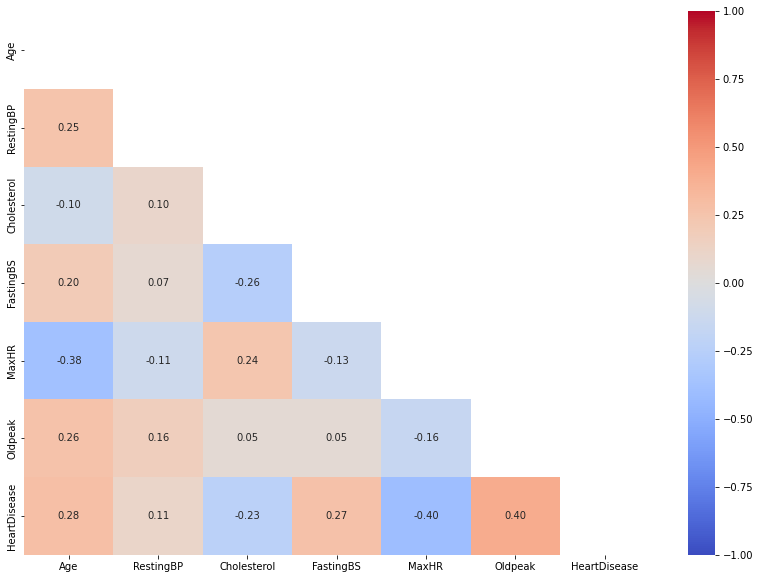

In [15]:
matrix = np.triu(df[numericalCols].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df[numericalCols].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

* Moderate Negative correlation between Cholesterol & Maximum Heart Rate with Heart Disease
* Moderate Positive correlation between Old Peak (Depressed ST) with Heart Disease
* Weak Positive correlation between Age & Fasting Blood Sugar Levels with Heart Disease

# Categorical variables analysis

In [16]:
for i in categoricalCols:
    print("Distinct Values for ", i, " - ", df[i].unique())

Distinct Values for  Sex  -  ['M' 'F']
Distinct Values for  ChestPainType  -  ['ATA' 'NAP' 'ASY' 'TA']
Distinct Values for  RestingECG  -  ['Normal' 'ST' 'LVH']
Distinct Values for  ExerciseAngina  -  ['N' 'Y']
Distinct Values for  ST_Slope  -  ['Up' 'Flat' 'Down']


We can see there are no zero variance columns (identical values) and no extremely high variance columns.

Let's check out the correlation between the Heart Disease and categorical variables

## Sex

In [44]:
traces = go.Bar(x = df.groupby("Sex").HeartDisease.sum().index, y = df.groupby("Sex").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Sex") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

In [52]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [55]:
df.groupby("Sex").HeartDisease.sum().divide(df.Sex.value_counts()) * 100

F    0.259067
M    0.631724
dtype: float64

## ChestPainType

In [45]:
traces = go.Bar(x = df.groupby("ChestPainType").HeartDisease.sum().index, y = df.groupby("ChestPainType").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Chest Pain Type") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

In [53]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

## ExerciseAngina

In [47]:
traces = go.Bar(x = df.groupby("ExerciseAngina").HeartDisease.sum().index, y = df.groupby("ExerciseAngina").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Chest Pain Type") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

## RestingECG

In [48]:
traces = go.Bar(x = df.groupby("RestingECG").HeartDisease.sum().index, y = df.groupby("RestingECG").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Chest Pain Type") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

## ST_Slope

In [49]:
traces = go.Bar(x = df.groupby("ST_Slope").HeartDisease.sum().index, y = df.groupby("ST_Slope").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Chest Pain Type") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

# Check for skewed classes on Heart Disease

In [18]:
df["HeartDisease"].skew()

-0.21508633825088655

In [19]:
print("Number of pacients which present a heart disease: ", df["HeartDisease"].value_counts()[1], ", ", "{:.2f}".format(df["HeartDisease"].value_counts(normalize = True)[1]*100), "% of total patients approximately")
print("Number of pacients which do not present a heart disease: ", df["HeartDisease"].value_counts()[0], ", ", "{:.2f}".format(df["HeartDisease"].value_counts(normalize = True)[0]*100), "% of total patients approximately")

Number of pacients which present a heart disease:  508 ,  55.34 % of total patients approximately
Number of pacients which do not present a heart disease:  410 ,  44.66 % of total patients approximately


Classes are well balanced